## Importing libraries and reading dataset

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
df = pd.read_csv('./dataset/dataset/train.csv')

In [72]:
df.head()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


In [73]:
numerical_cols = ['AdultMortality', 'AdultMortality-Female', 'AdultMortality-Male', 'SLS', 'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI', 'Under5LS', 'Polio', 'TotalExpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP', 'Population', 'Thinness1-19years','IncomeCompositionOfResources' ,'Thinness5-9years', 'Schooling' ]
categorical_cols = ['Country', 'Year', 'Status']
target = 'TARGET_LifeExpectancy'

## Exploratory Data Analysis

### Data distribution

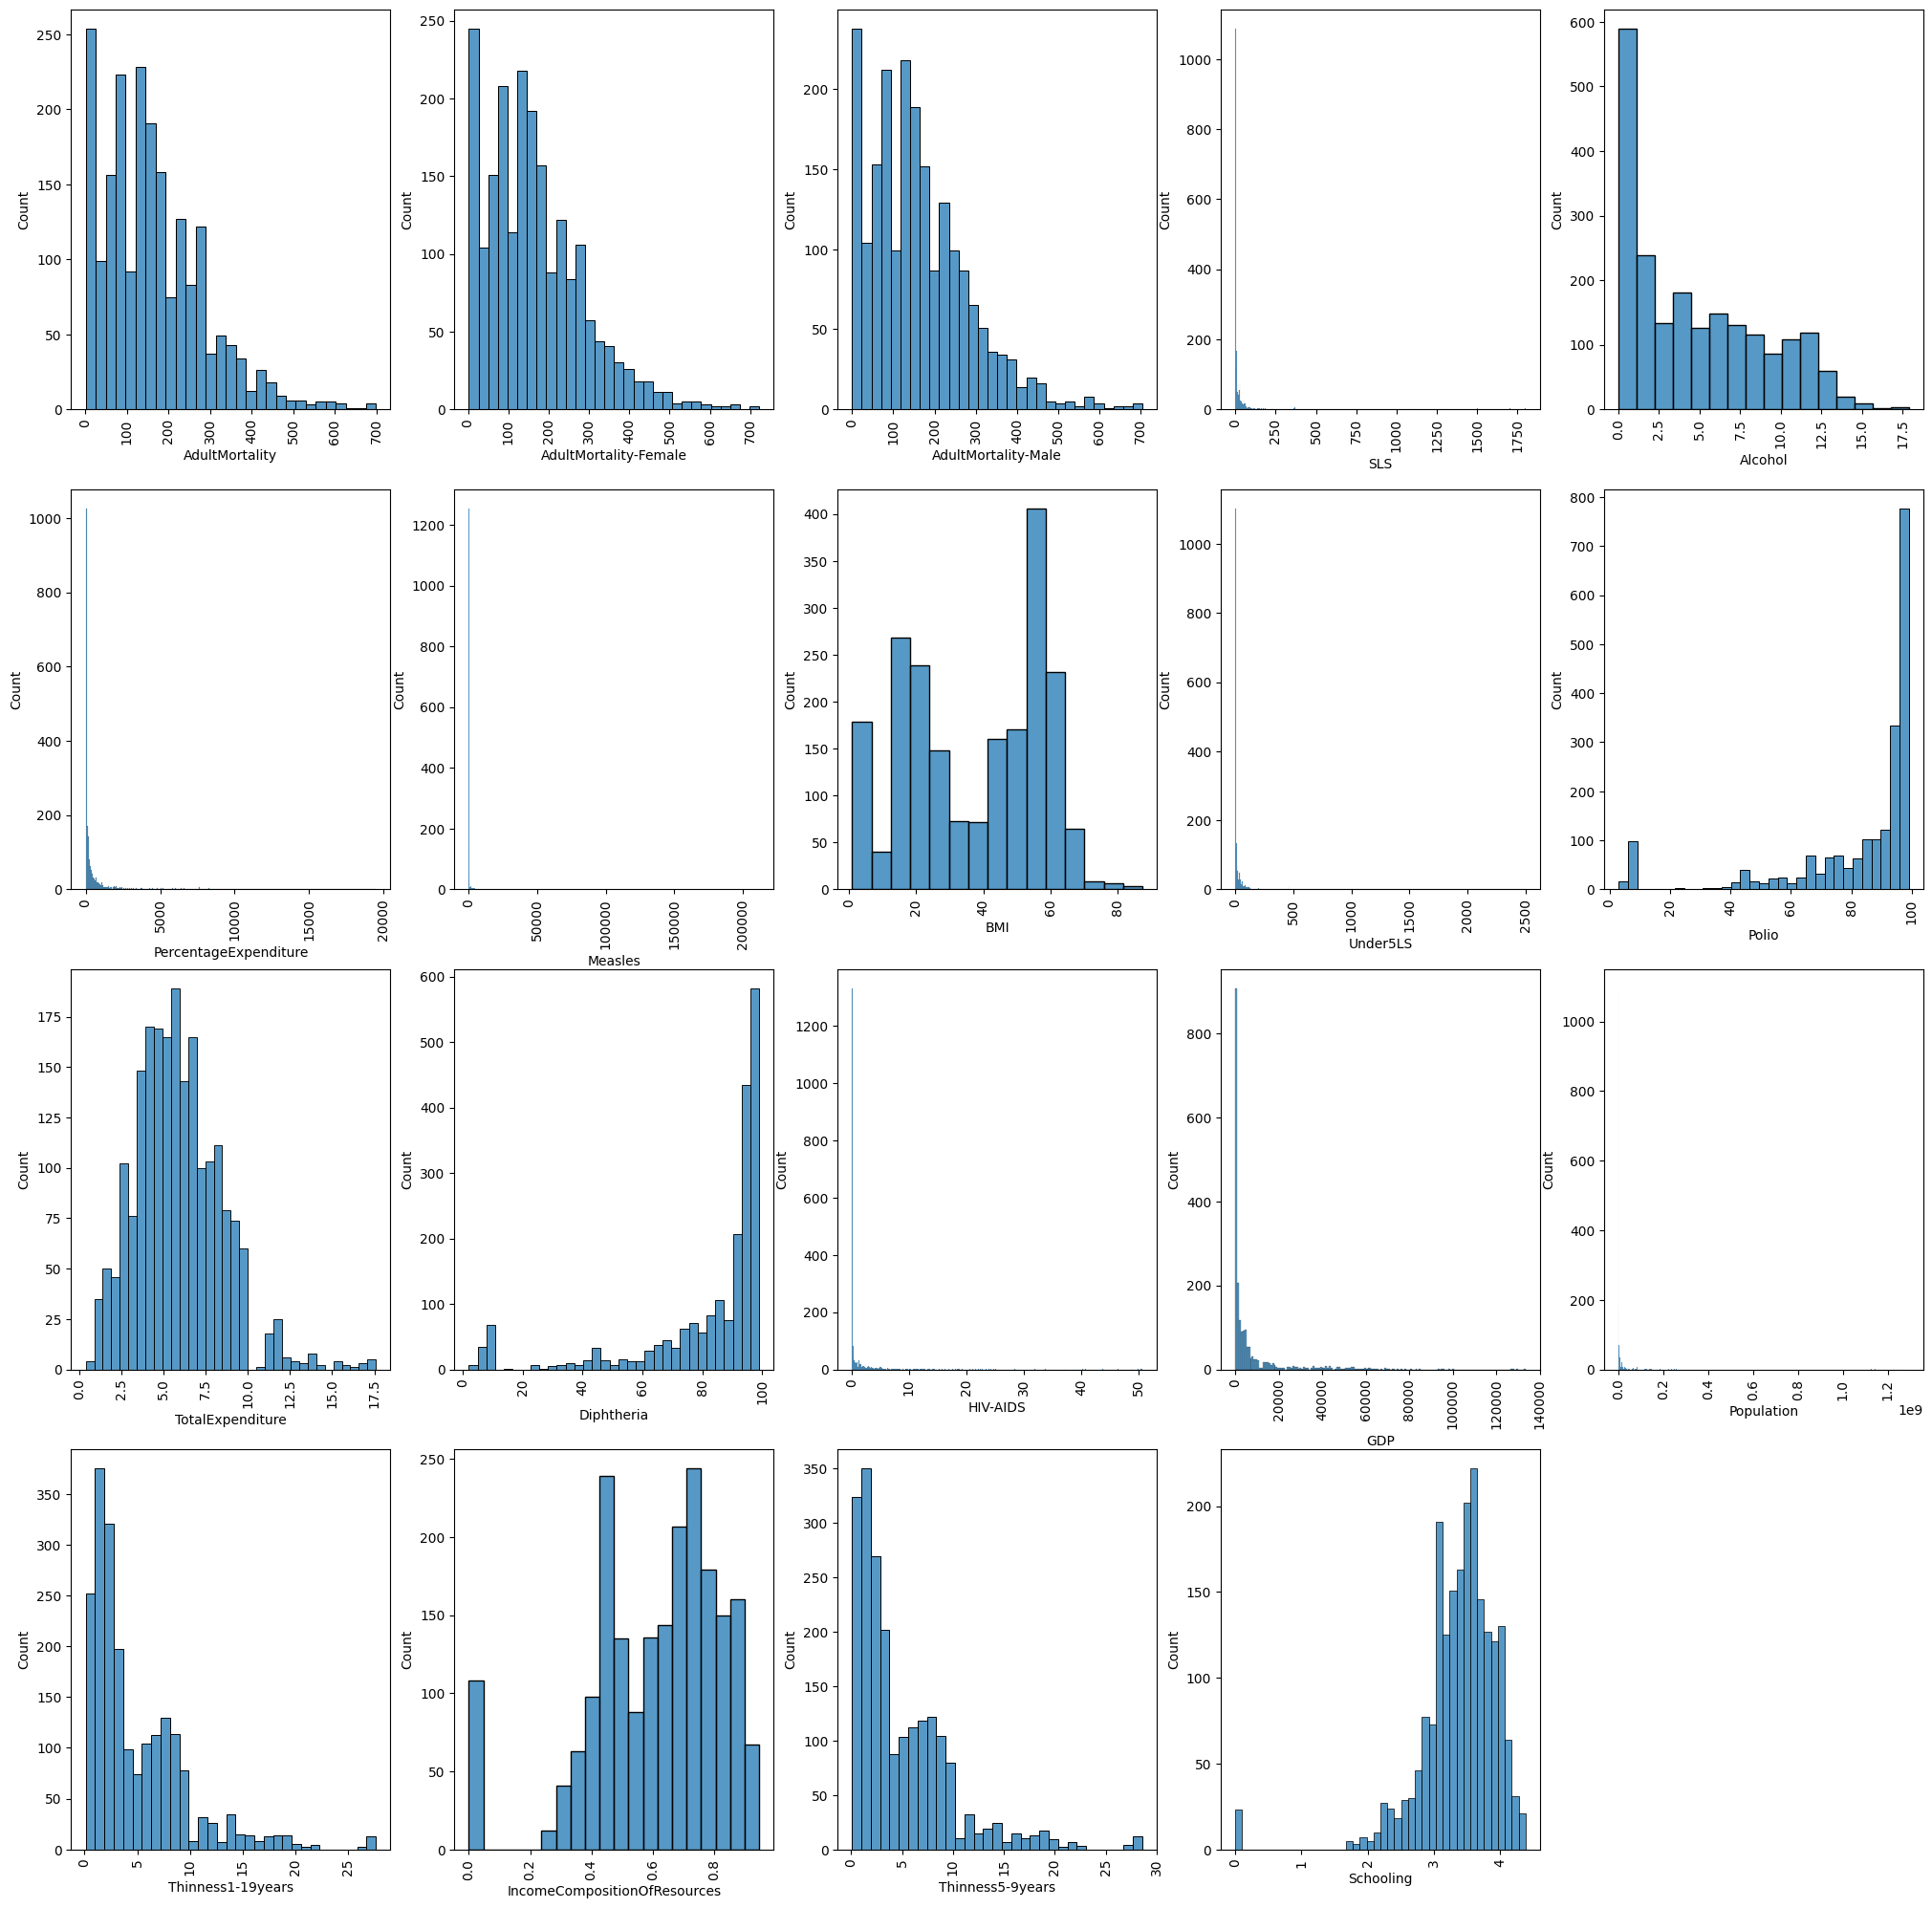

In [74]:
plt.figure(figsize=(25, 25))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i + 1)
    sns.histplot(df[col])
    # plt.title(col)
    plt.xticks(rotation='vertical')

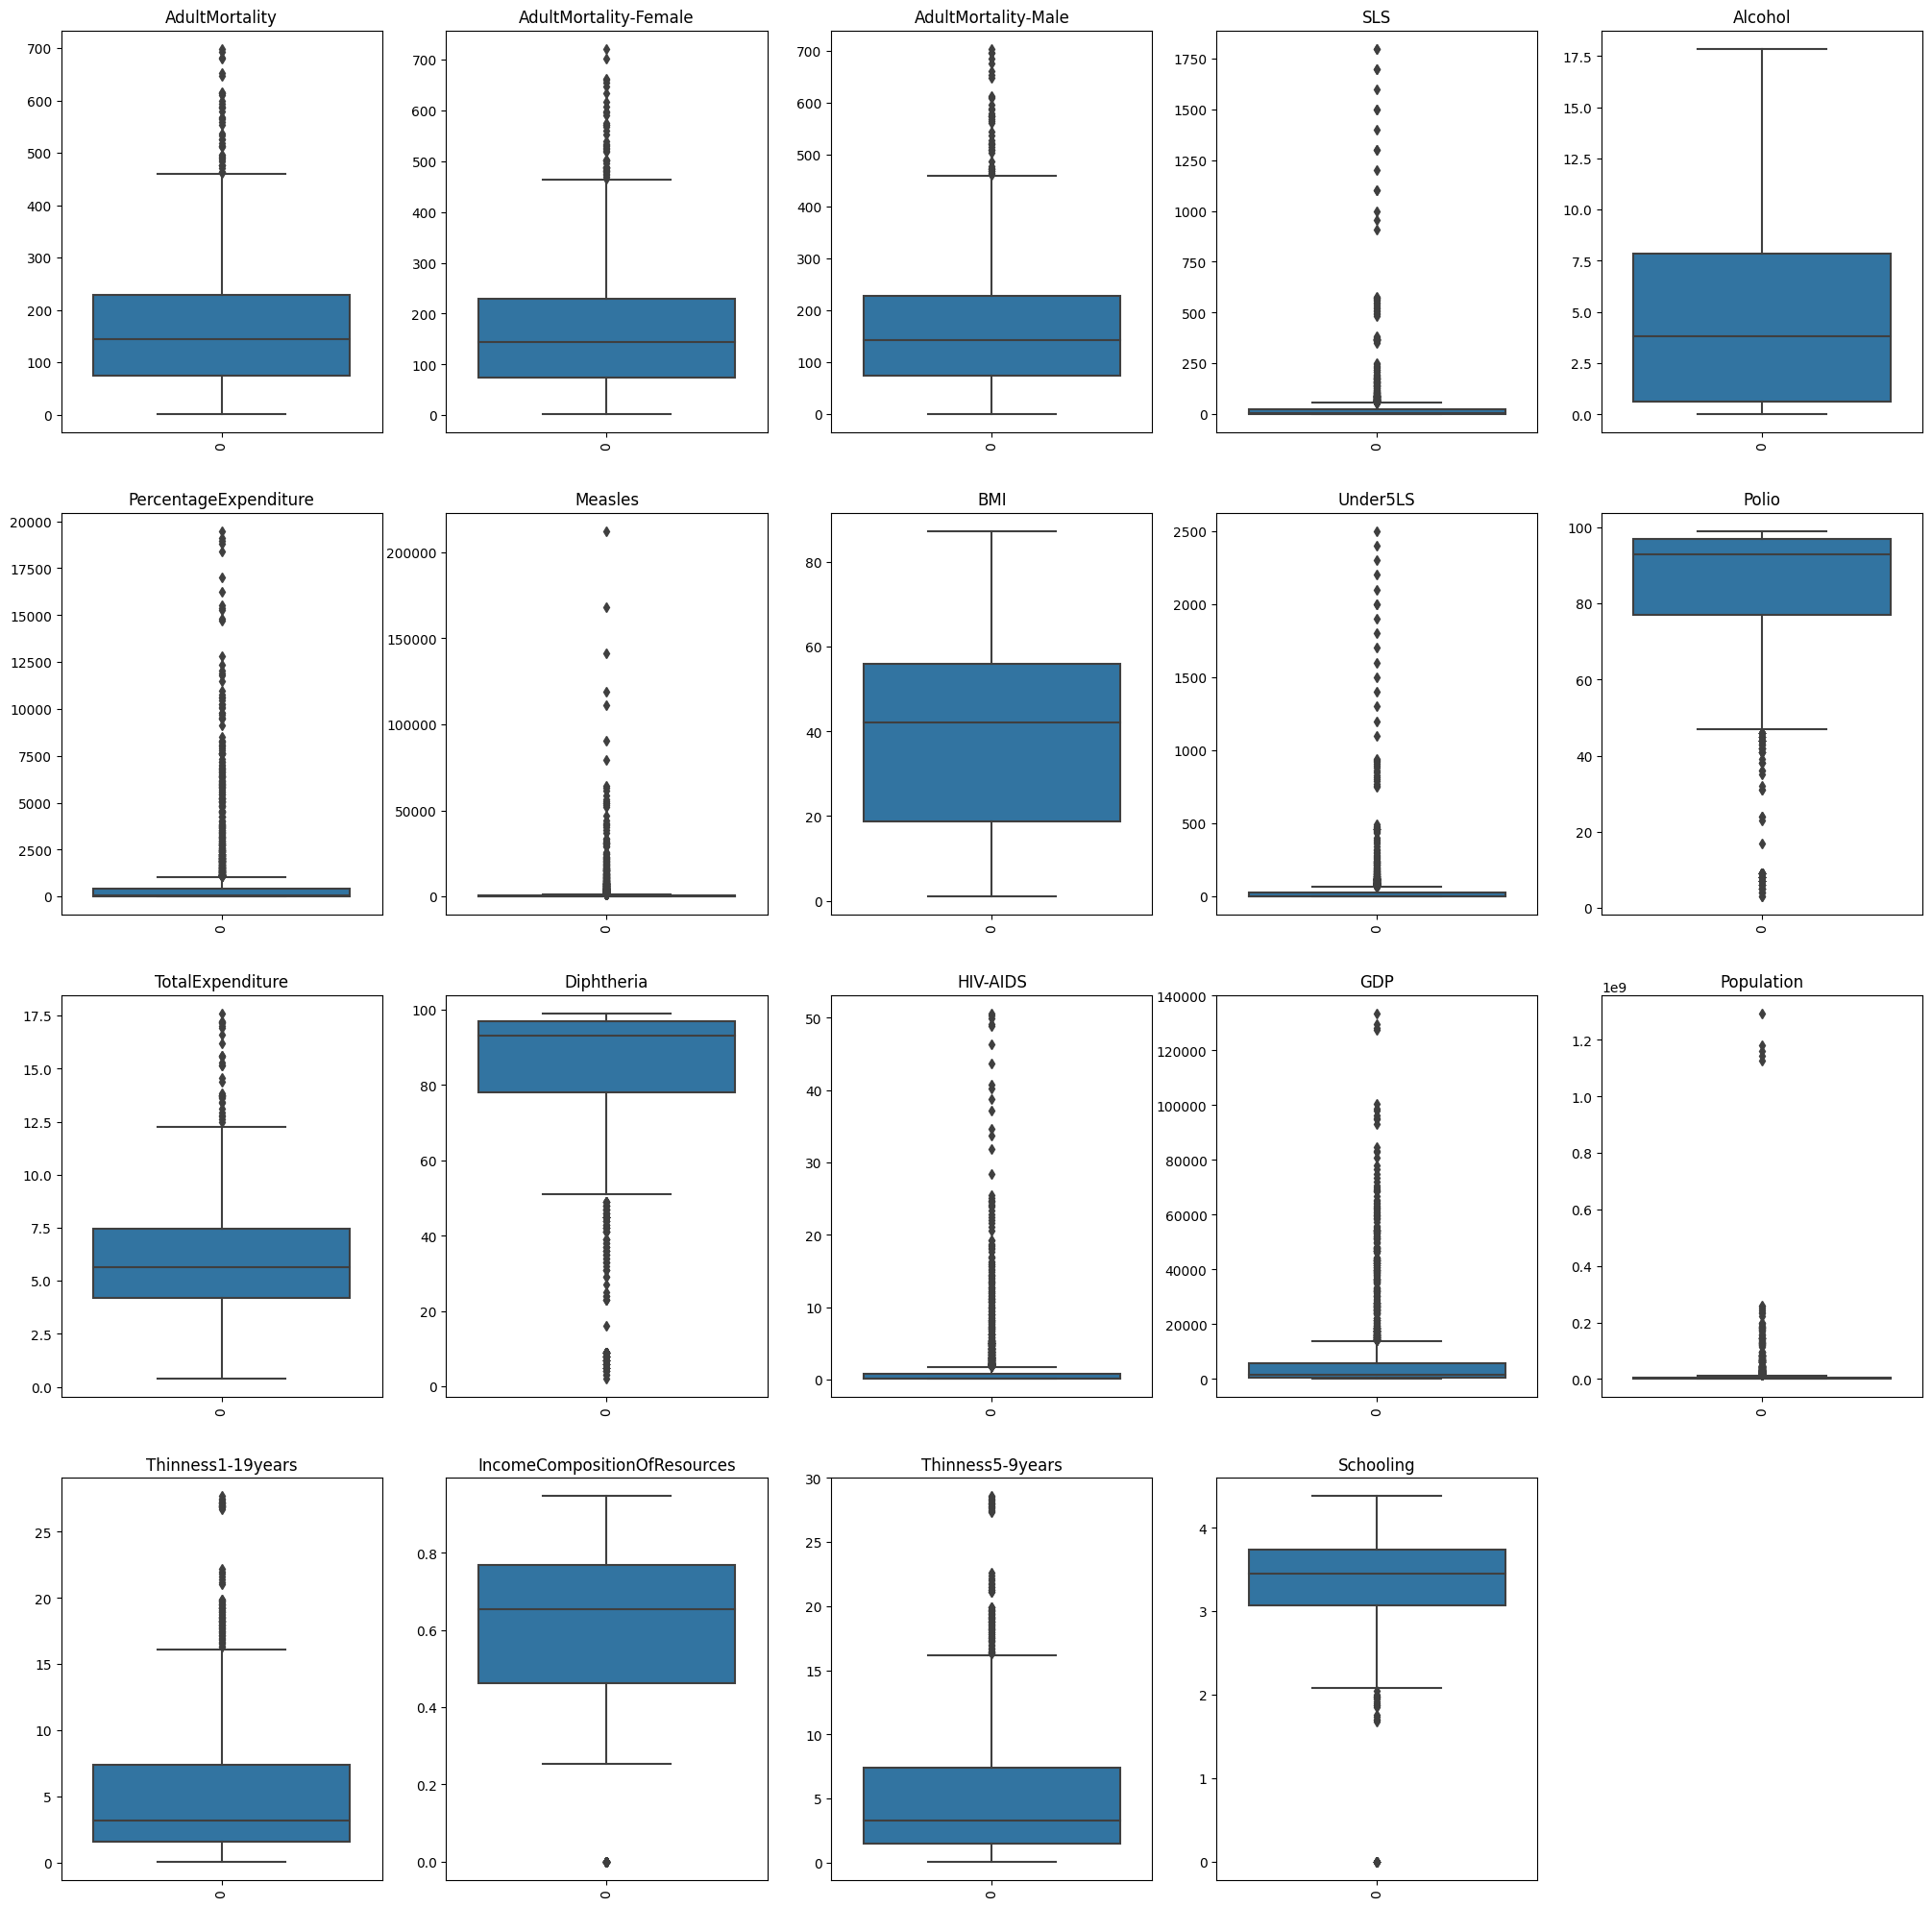

In [75]:
plt.figure(figsize=(25, 25))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(df[col])
    plt.title(col)
    plt.xticks(rotation='vertical')

### Relationship with target variable

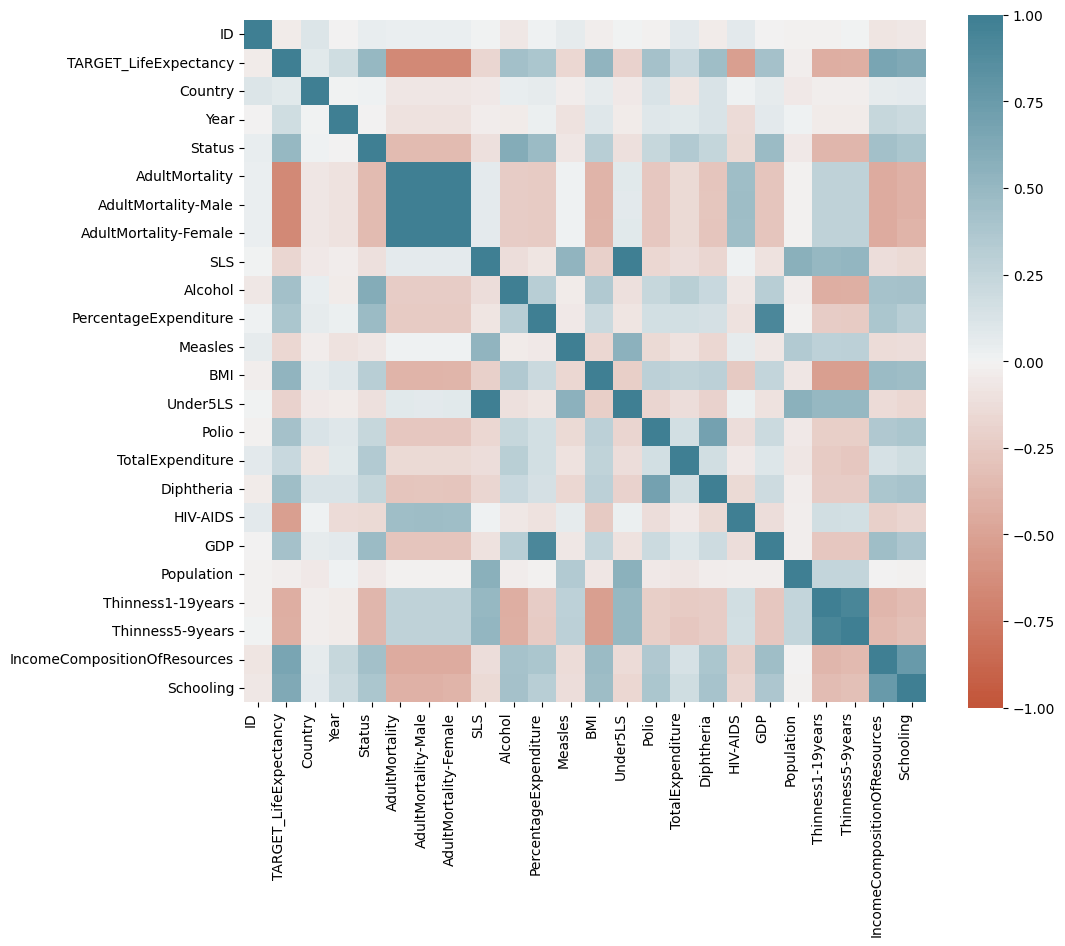

In [76]:
f, ax = plt.subplots(figsize=(11, 9))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

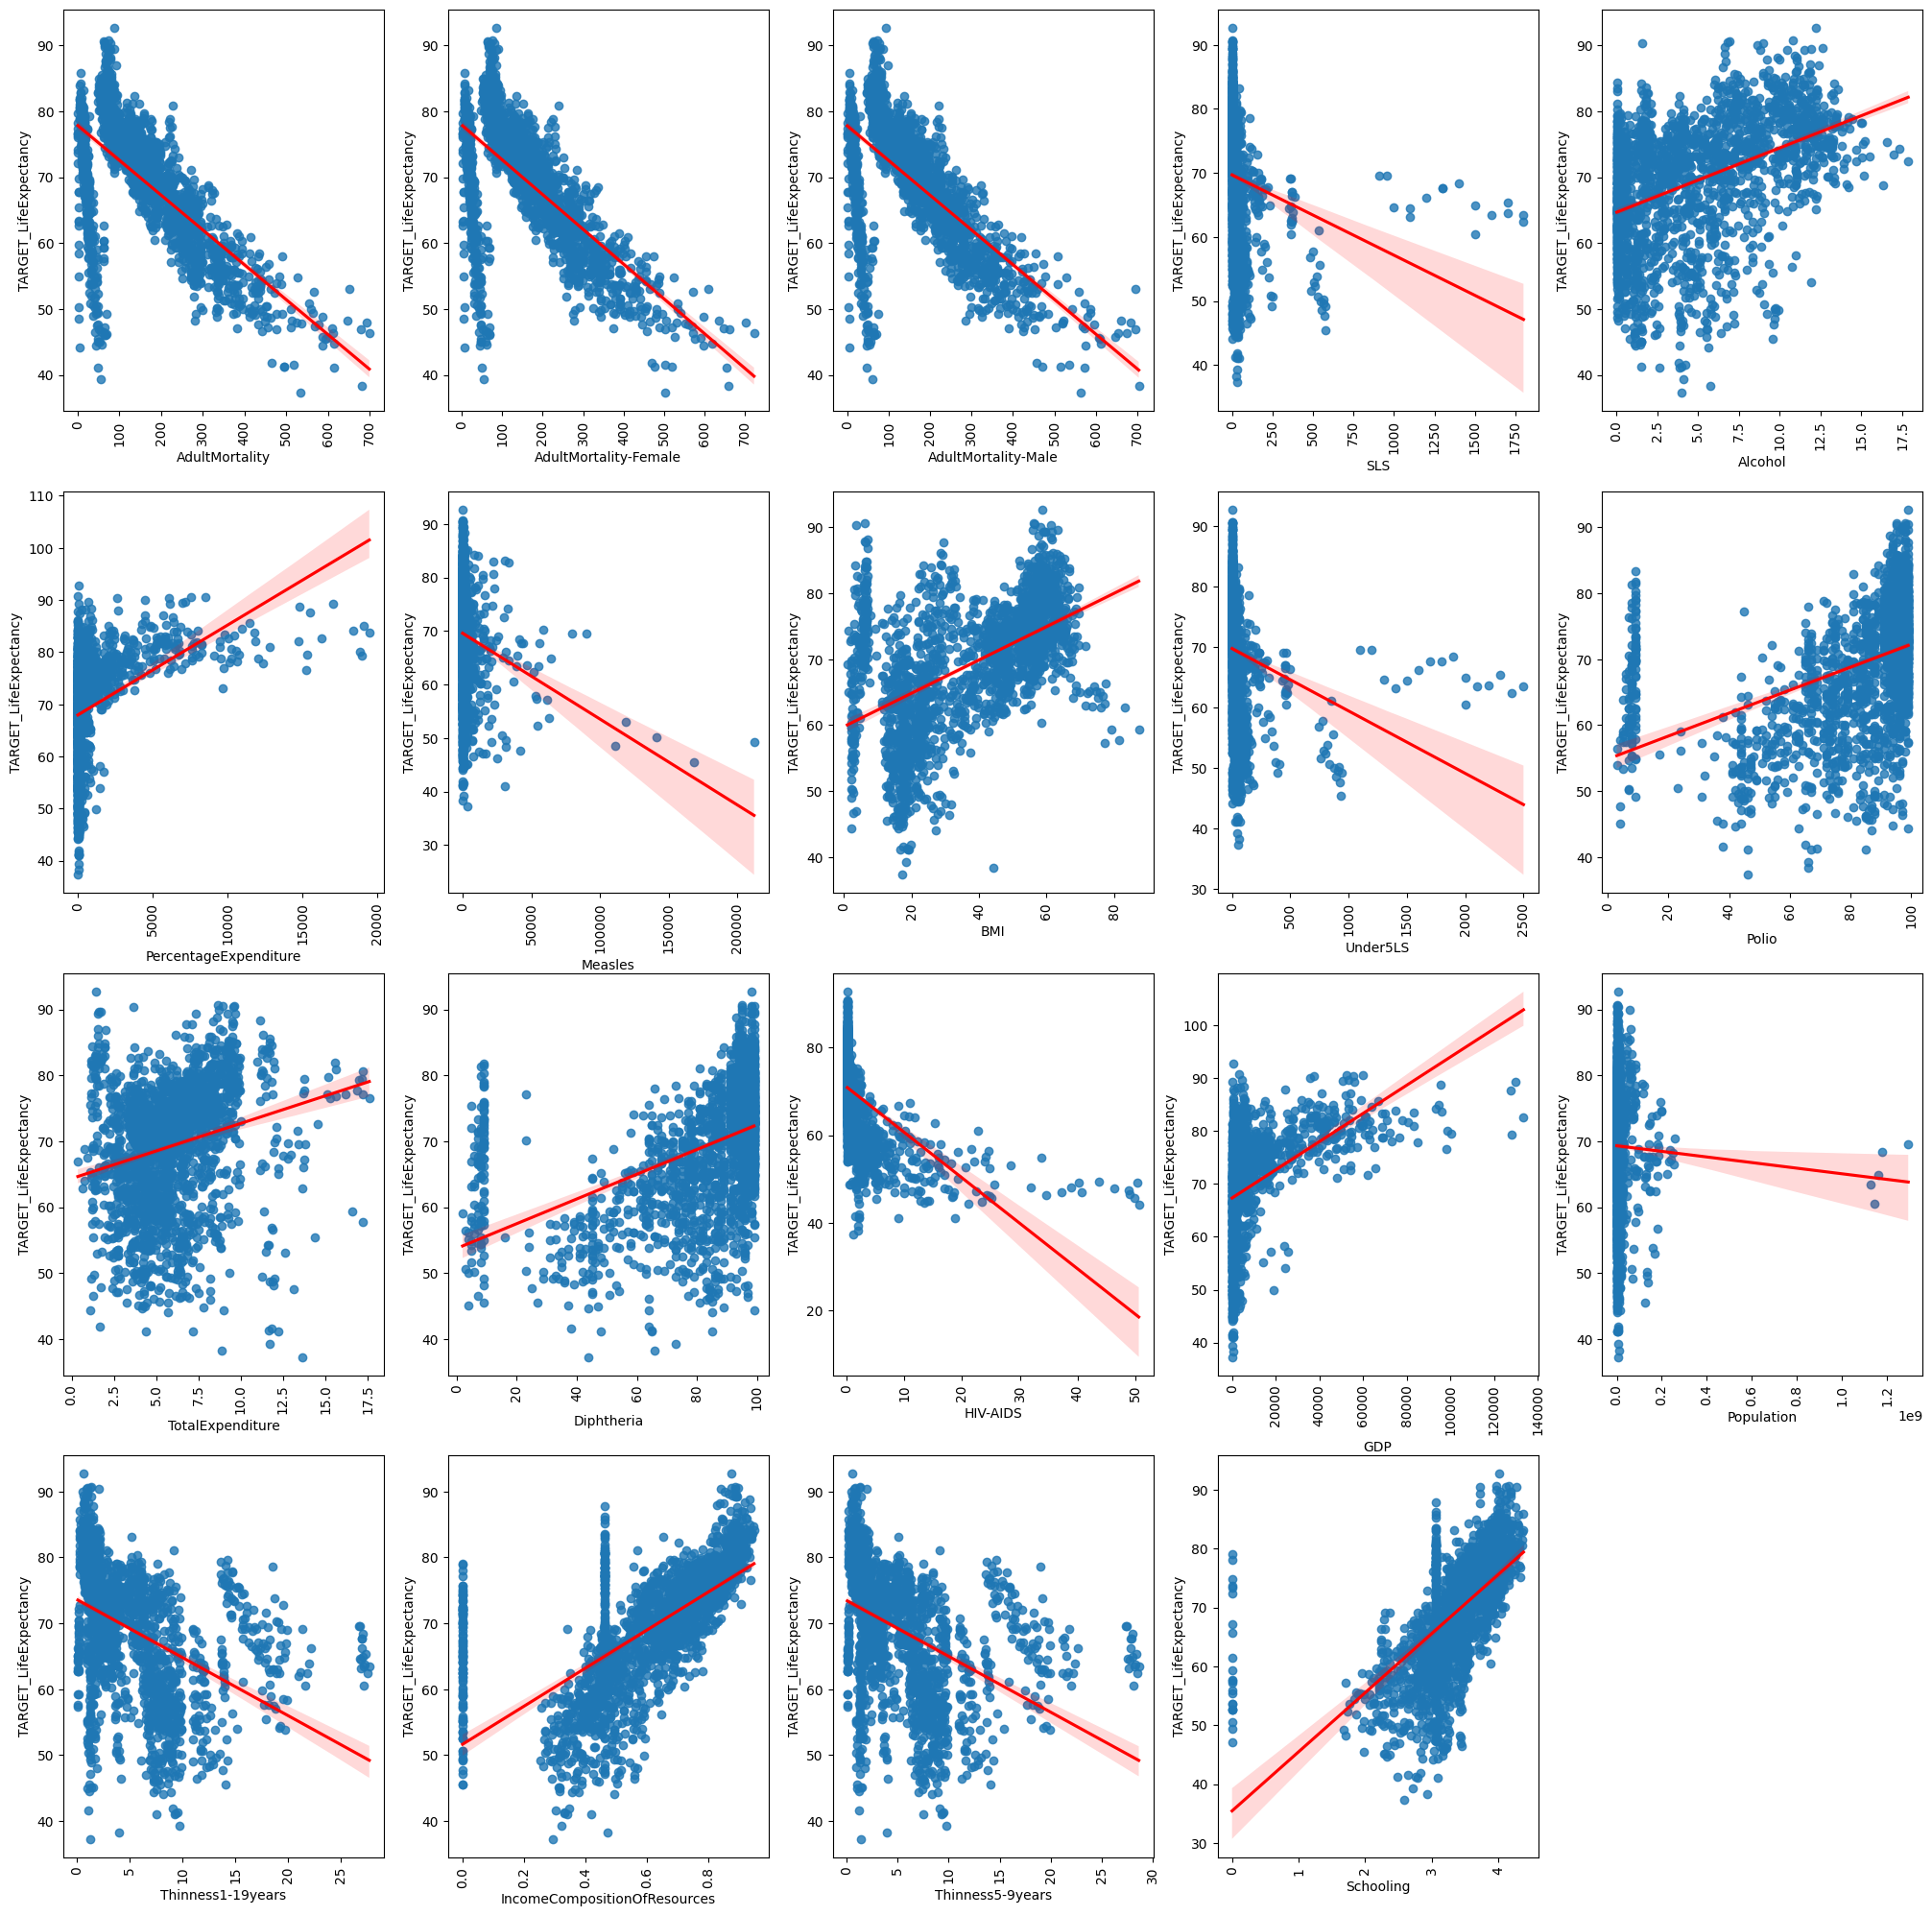

In [77]:
plt.figure(figsize=(25, 25))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i + 1)
    sns.regplot(data=df, x=df[col], y=df['TARGET_LifeExpectancy'], line_kws=dict(color='r') , logx=False)
    # plt.title(col)
    plt.xticks(rotation='vertical')

<Axes: xlabel='TARGET_LifeExpectancy', ylabel='Year'>

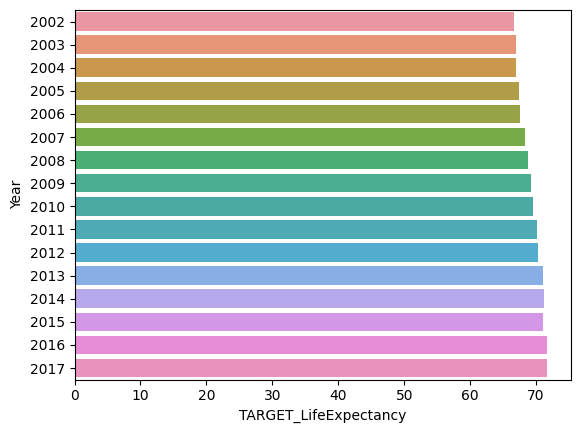

In [78]:
group_by = df.groupby('Year').mean().reset_index()
group_by
sns.barplot(x=group_by[target], y=group_by['Year'], orient='h')

<Axes: xlabel='TARGET_LifeExpectancy', ylabel='Status'>

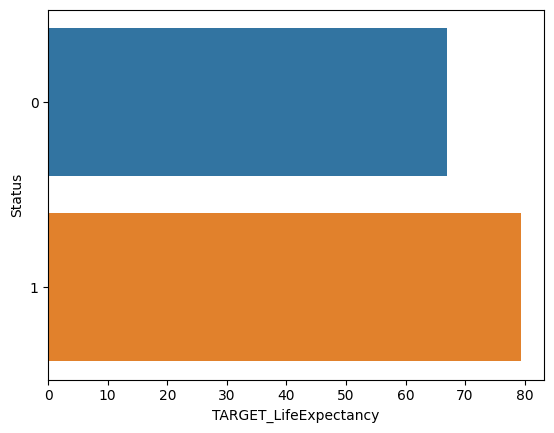

In [79]:
group_by = df.groupby('Status').mean().reset_index()
group_by
sns.barplot(x=group_by[target], y=group_by['Status'], orient='h')

## Data splitting

In [50]:
df_X = df.drop(columns=[target])
df_y = df[target]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### Check split

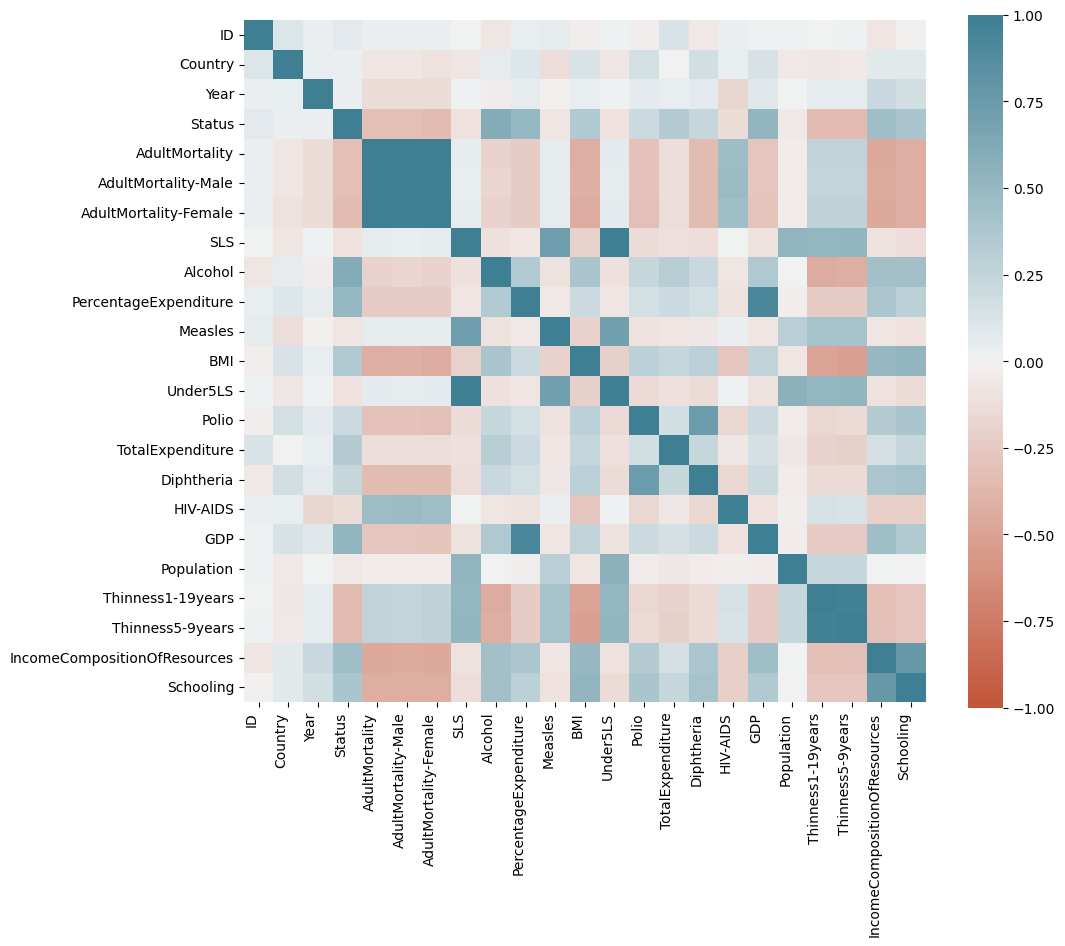

In [51]:
f, ax = plt.subplots(figsize=(11, 9))
corr = X_test.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

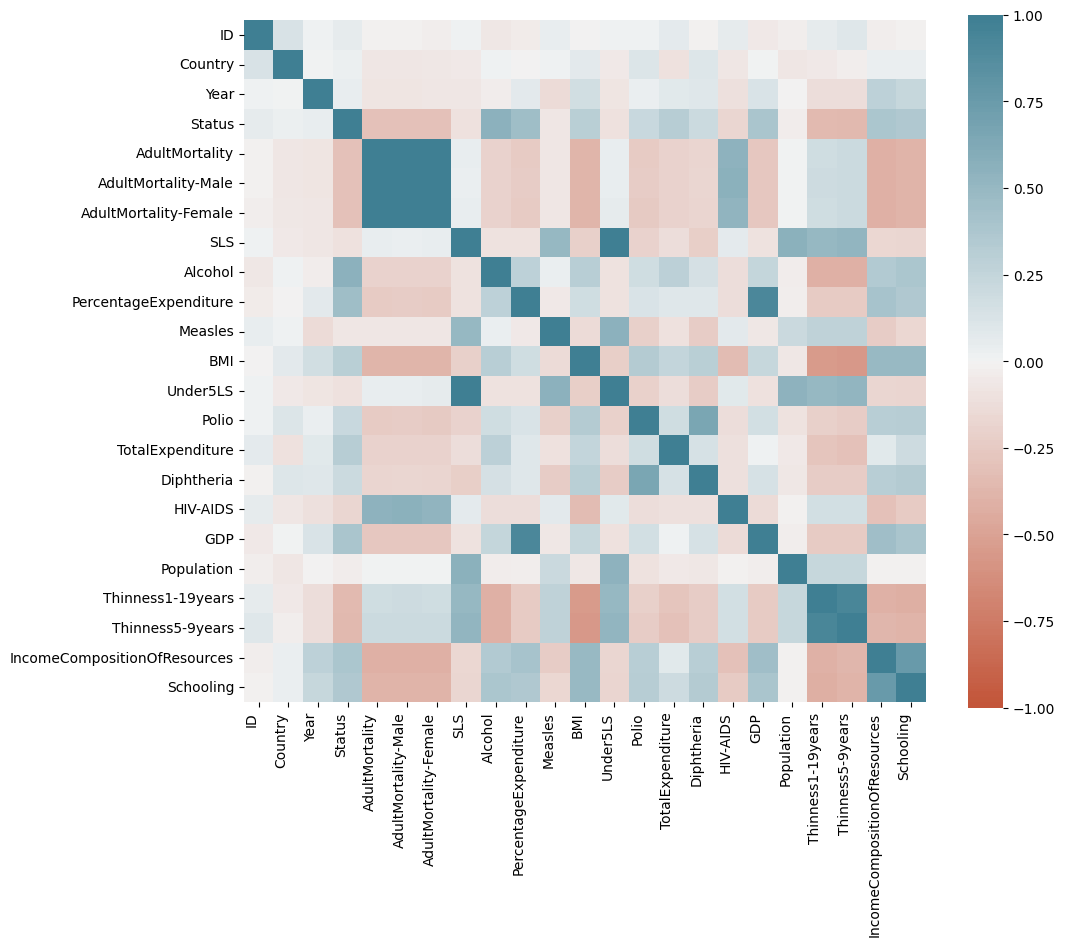

In [52]:
f, ax = plt.subplots(figsize=(11, 9))
corr = X_val.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

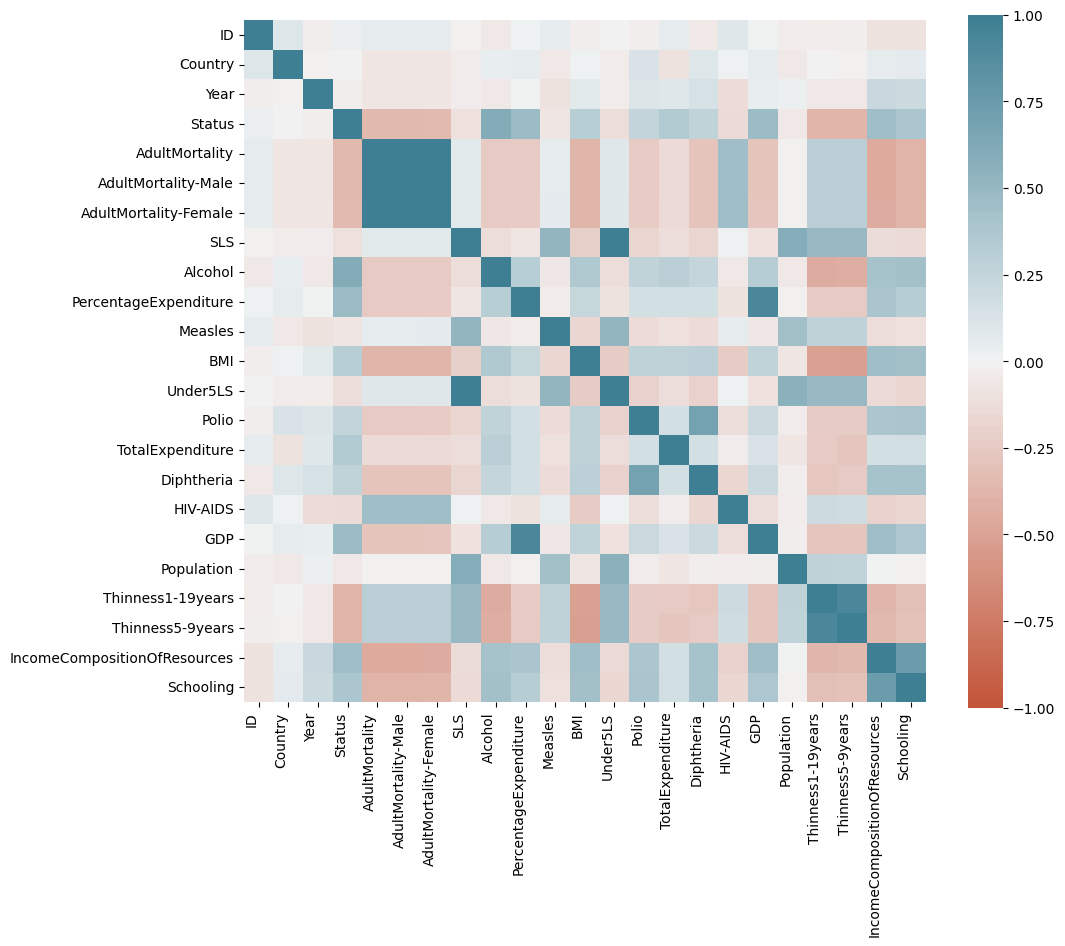

In [53]:
f, ax = plt.subplots(figsize=(11, 9))
corr = X_train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

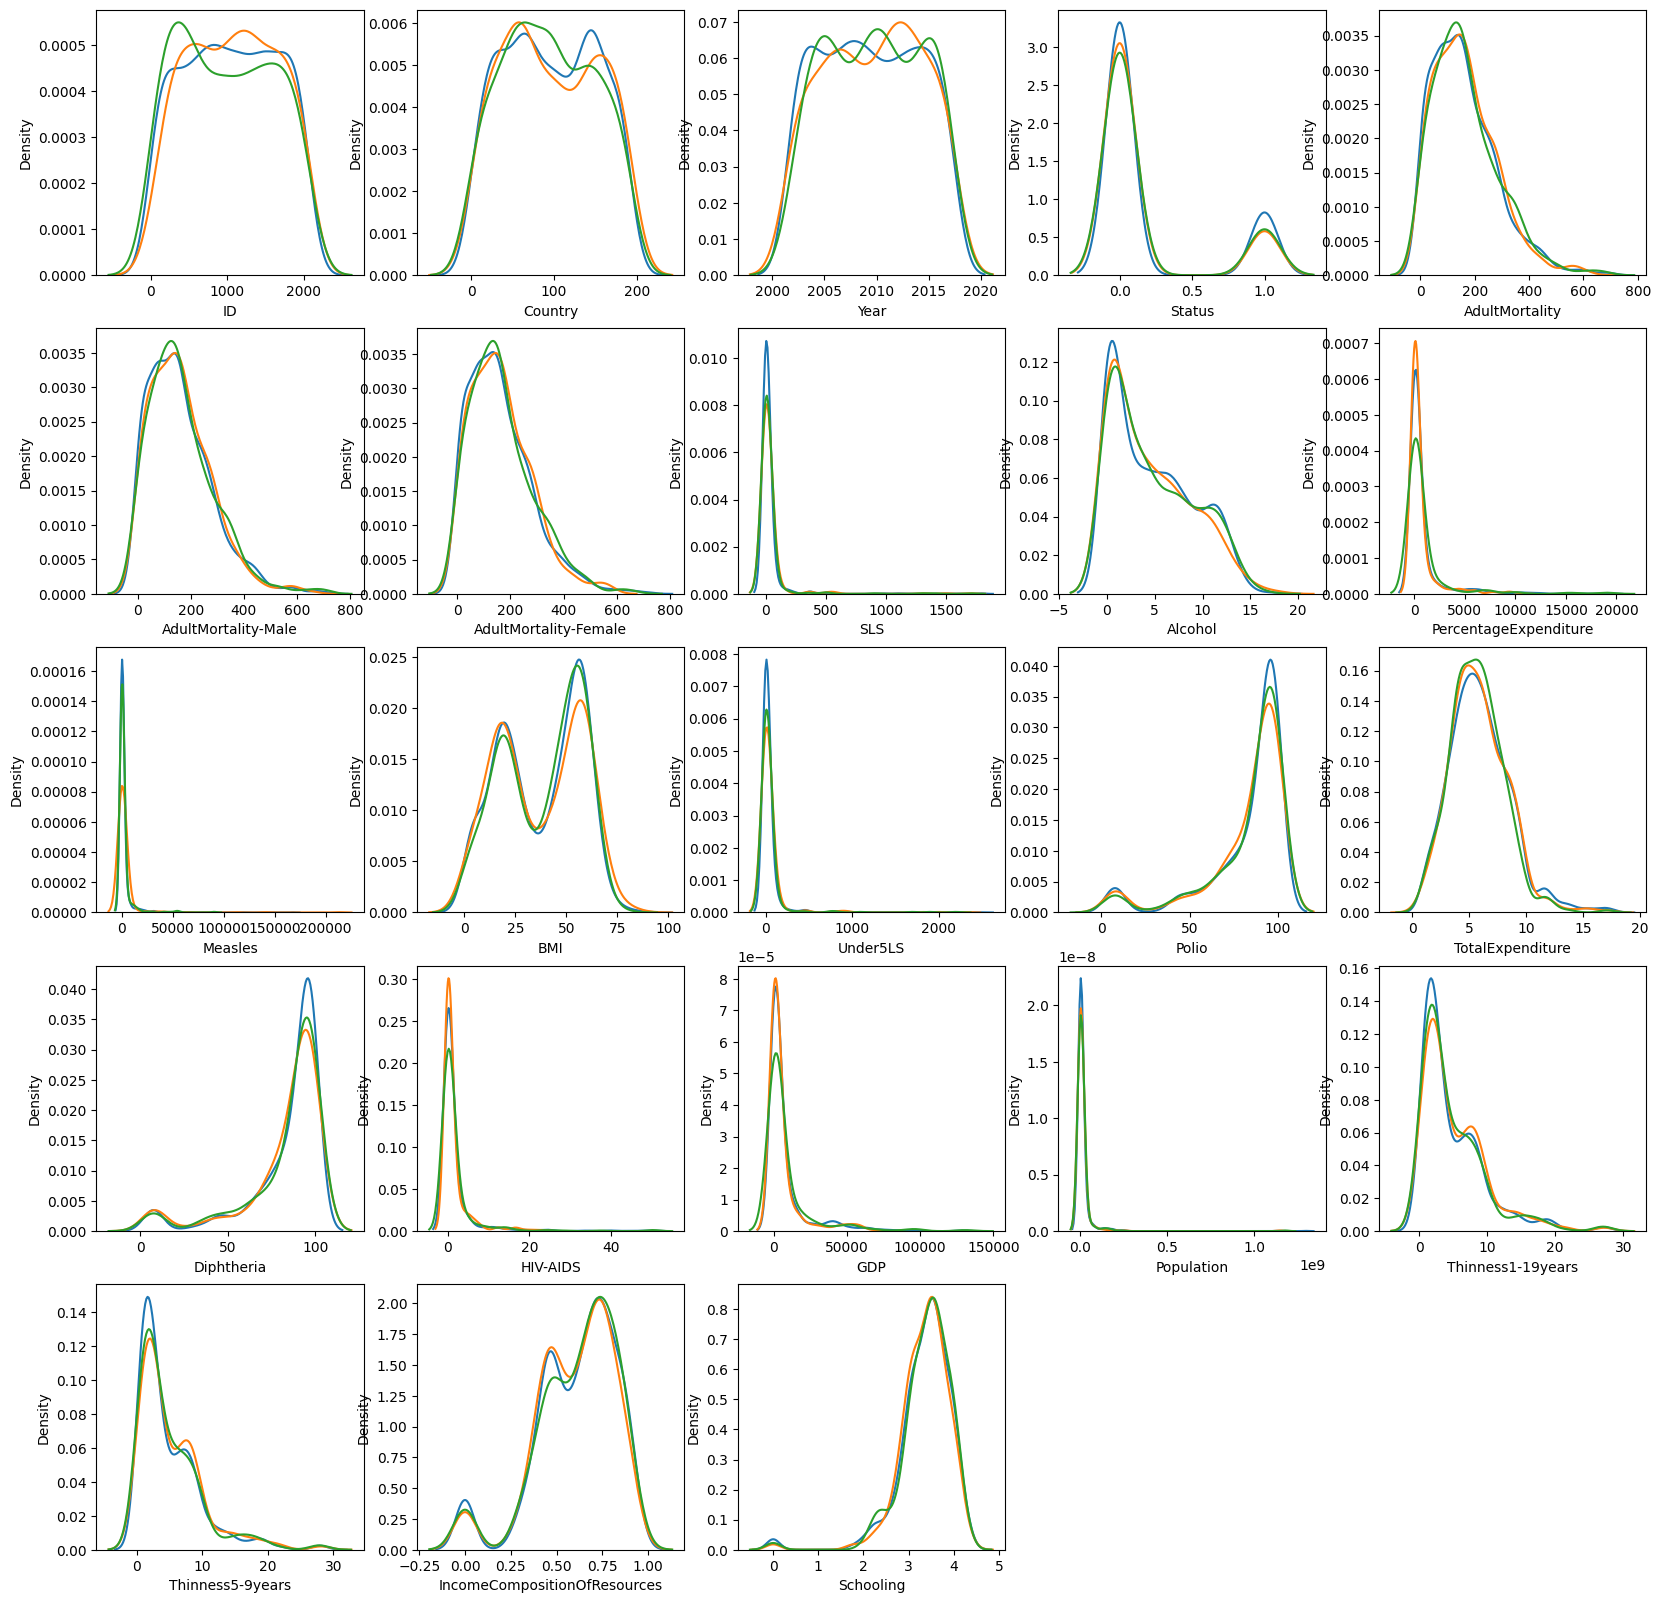

In [54]:
cols = X_train.columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(cols):
    plt.subplot(5,5, i + 1)
    sns.kdeplot(data=X_train, x=col, )
    plt.subplot(5,5, i + 1)
    sns.kdeplot(data=X_val, x=col)
    plt.subplot(5,5, i + 1)
    sns.kdeplot(data=X_test, x=col)

## Data transformation

### Encoding categorical data

In [55]:
# Fit only on the train set
to_encode = ['Country', 'Year', 'Status']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train[to_encode])
encoded_cols = list(encoder.get_feature_names_out(to_encode))
print(encoded_cols)
X_train[encoded_cols] = encoder.transform(X_train[to_encode])
X_val[encoded_cols] = encoder.transform(X_val[to_encode])
X_test[encoded_cols] = encoder.transform(X_test[to_encode])

['Country_0', 'Country_2', 'Country_4', 'Country_5', 'Country_6', 'Country_9', 'Country_11', 'Country_13', 'Country_14', 'Country_15', 'Country_18', 'Country_19', 'Country_21', 'Country_23', 'Country_24', 'Country_25', 'Country_26', 'Country_27', 'Country_28', 'Country_29', 'Country_30', 'Country_31', 'Country_33', 'Country_34', 'Country_36', 'Country_37', 'Country_39', 'Country_42', 'Country_43', 'Country_44', 'Country_46', 'Country_47', 'Country_48', 'Country_50', 'Country_51', 'Country_53', 'Country_54', 'Country_55', 'Country_57', 'Country_58', 'Country_59', 'Country_60', 'Country_61', 'Country_62', 'Country_64', 'Country_65', 'Country_66', 'Country_67', 'Country_68', 'Country_69', 'Country_70', 'Country_71', 'Country_72', 'Country_73', 'Country_74', 'Country_75', 'Country_77', 'Country_79', 'Country_80', 'Country_83', 'Country_84', 'Country_85', 'Country_86', 'Country_88', 'Country_90', 'Country_91', 'Country_92', 'Country_93', 'Country_94', 'Country_95', 'Country_96', 'Country_97

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33988\260925770.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[encoded_cols] = encoder.transform(X_train[to_encode])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33988\260925770.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[encoded_cols] = encoder.transform(X_train[to_encode])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33988\260925770.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

### Transform numeric

In [56]:
numeric_transform_cols = ['AdultMortality','AdultMortality-Female', 'AdultMortality-Male', 'Alcohol', 'BMI', 'IncomeCompositionOfResources','Schooling' ]
# numeric_transform_cols = numerical_cols

In [57]:
from sklearn.preprocessing import PowerTransformer
for i, col in enumerate(numeric_transform_cols):
    # transformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(X_train[[col]])
    transformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(X_train[[col]])
    X_train[col] = transformer.transform(X_train[[col]])
    X_val[col] = transformer.transform(X_val[[col]])
    X_test[col] = transformer.transform(X_test[[col]])

In [58]:
# plt.figure(figsize=(25, 25))

# for i, col in enumerate(numerical_cols):
#     plt.subplot(4, 5, i + 1)
#     sns.boxplot(df[col])
#     plt.title(col)
#     plt.xticks(rotation='vertical')

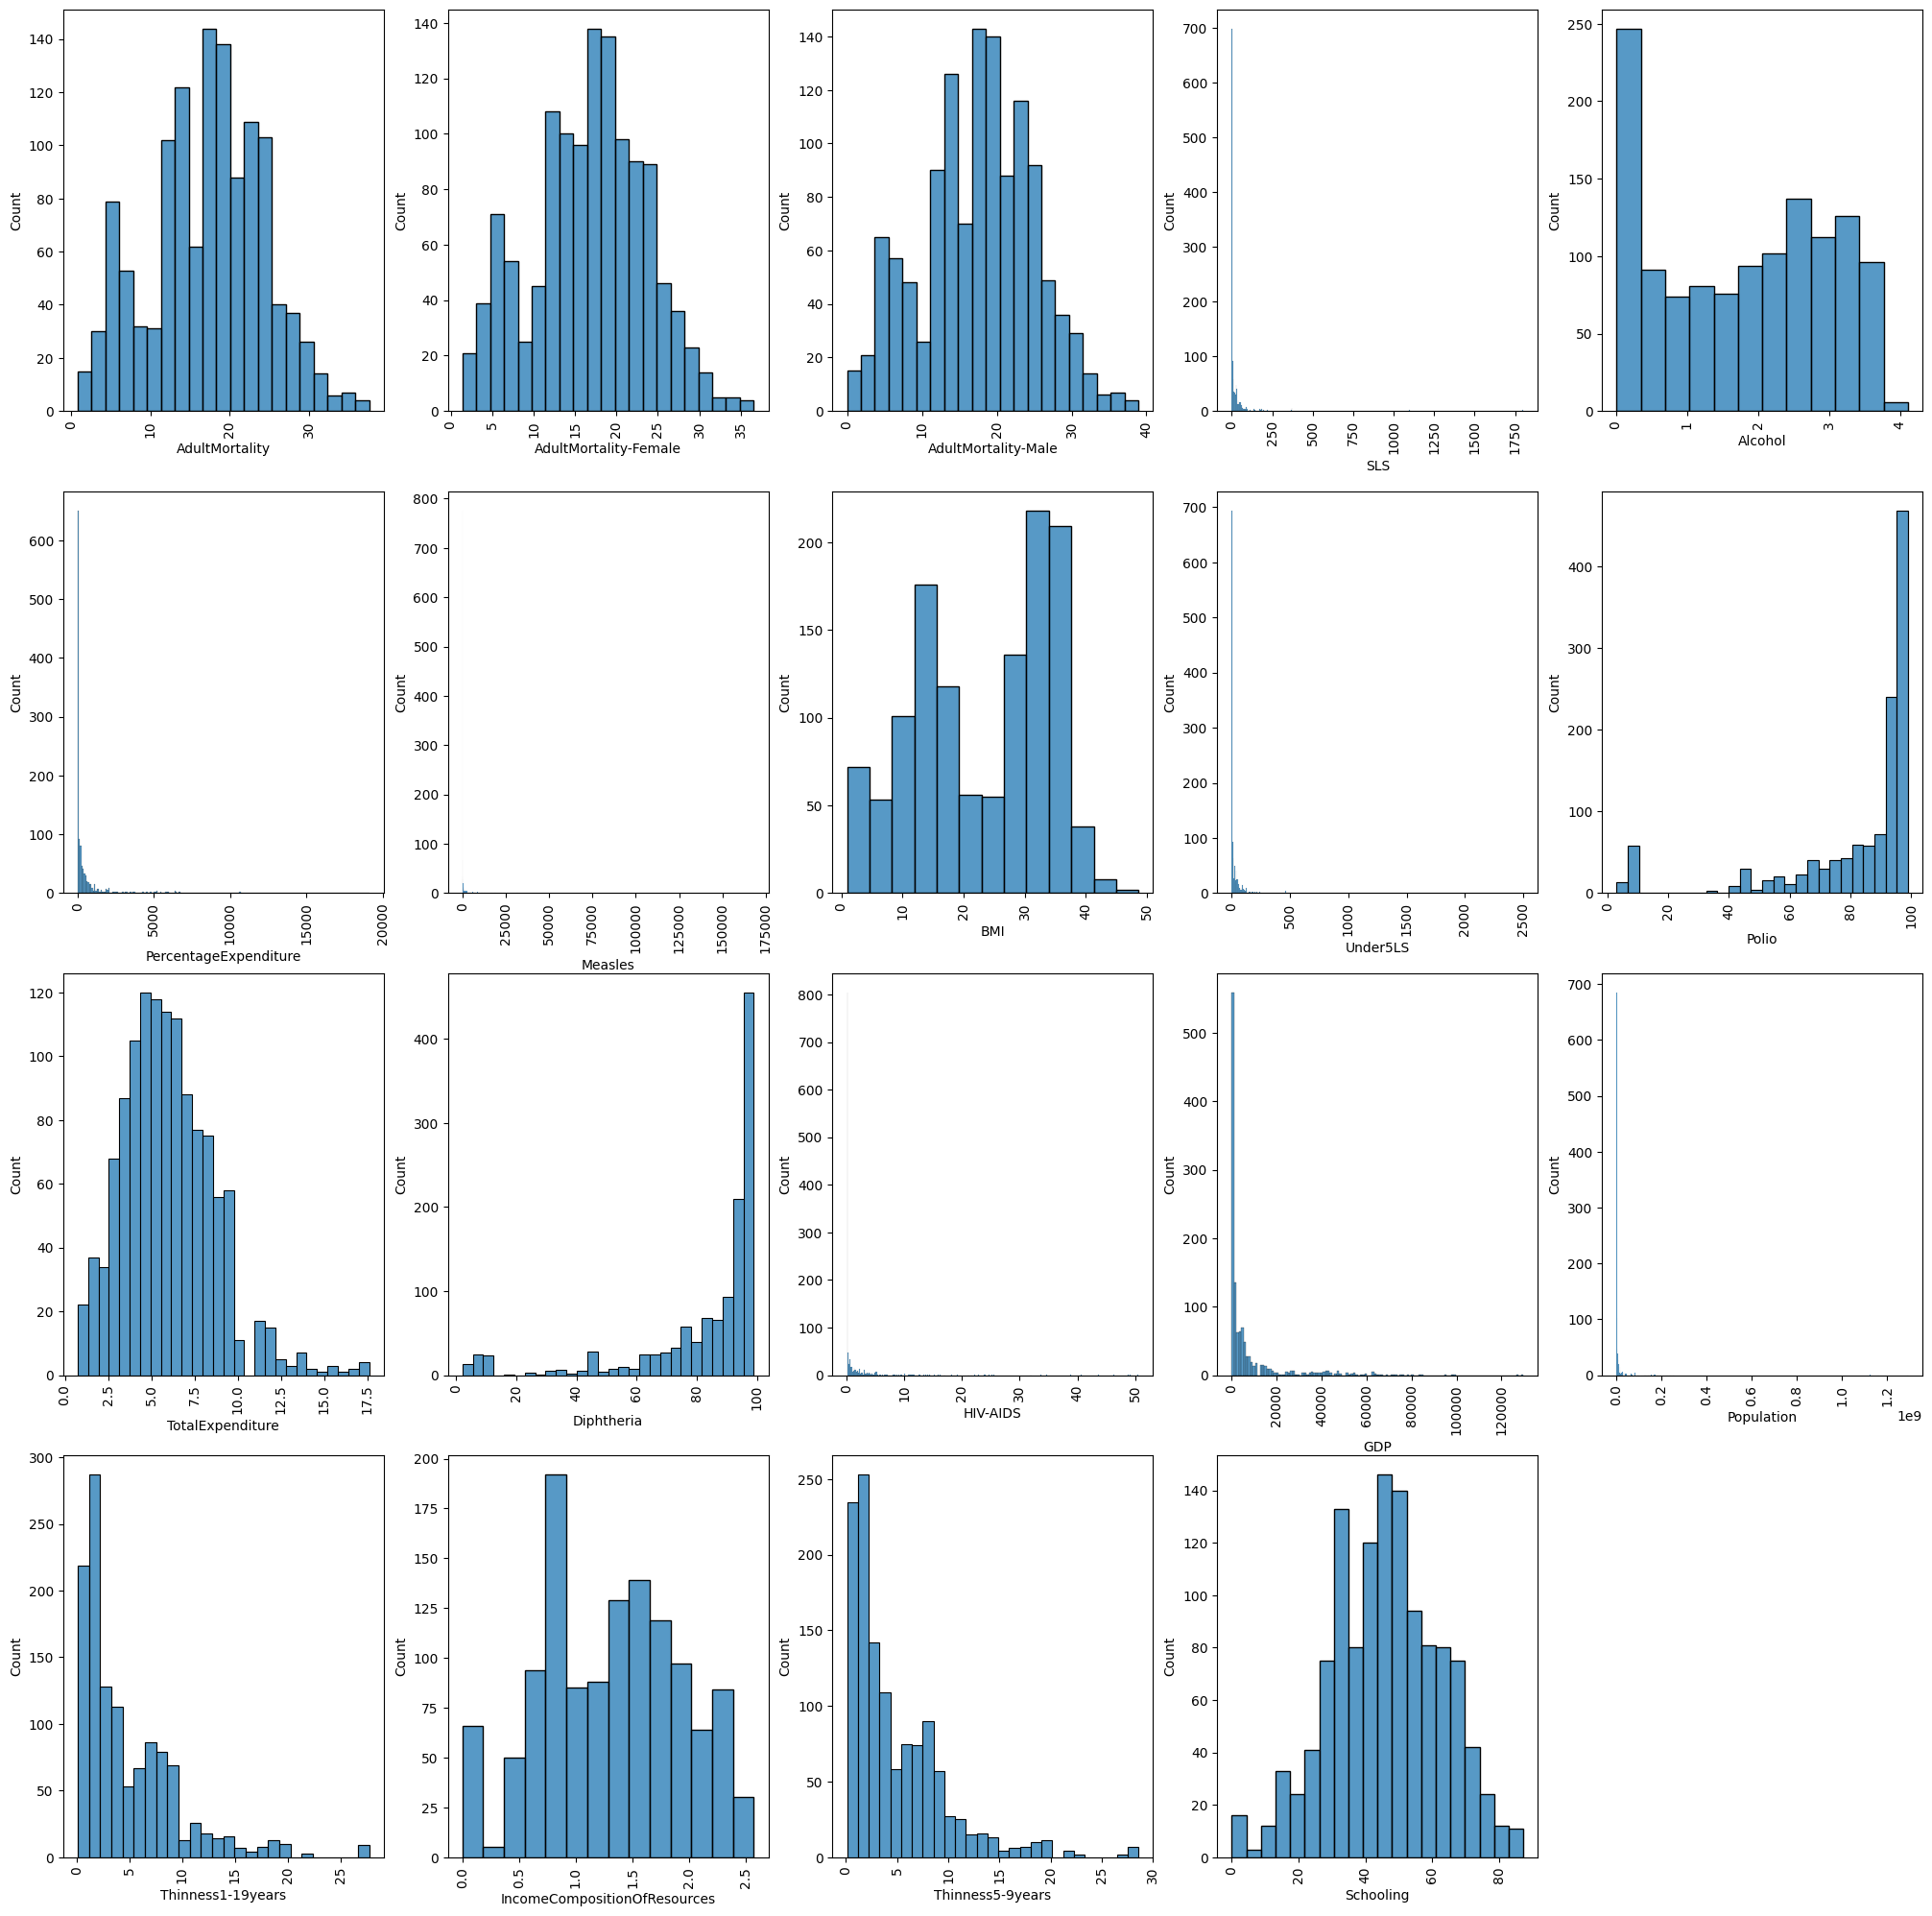

In [59]:
plt.figure(figsize=(25, 25))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i + 1)
    sns.histplot(X_train[col])
    # plt.title(col)
    plt.xticks(rotation='vertical')

### Scaler

In [60]:
scaler = RobustScaler()
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

## Baseline Model

In [61]:
# Base line model linear regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
model = LinearRegression()
linear_cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
linear_mse_score = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error)))

In [62]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = ["PercentageExpenditure", "GDP", "HIV-AIDS"]
X_train_polynomial = X_train.copy()
poly = PolynomialFeatures(2)
poly.fit(X_train_polynomial[polynomial_features])
transformed = list(poly.get_feature_names_out())

X_train_polynomial[transformed] = poly.transform(X_train[polynomial_features])

In [63]:
scores_df = pd.DataFrame({
    'Linear Regression': [-88589693162.93797,
77985499843437.23],
    'Polynomial Regression': [-15820431760454.615,
440031853899673.1], 
    "Score type": ["r2 score", "MSE"]
})
scores_df

,Linear Regression,Polynomial Regression,Score type
0,-8.858969e+10,-1.582043e+13,r2 score
1,7.798550e+13,4.400319e+14,MSE


### Multicollinearity in baseline model

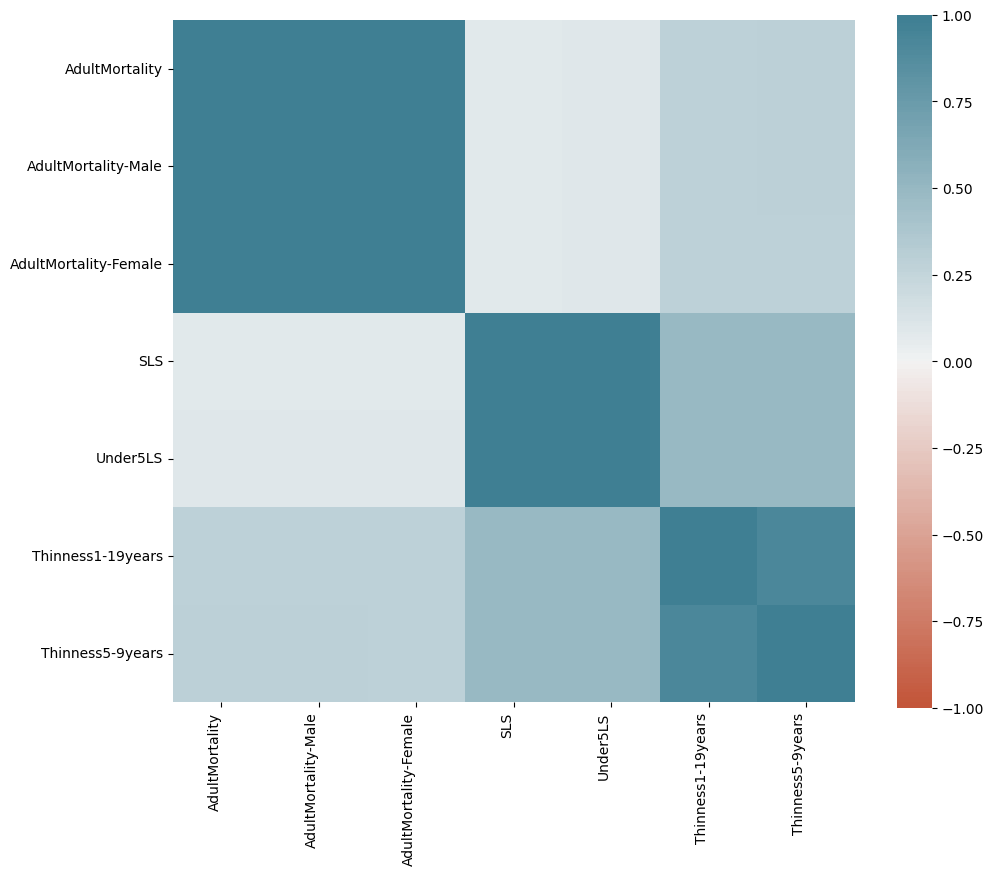

In [64]:
f, ax = plt.subplots(figsize=(11, 9))
corr = X_train[['AdultMortality', 'AdultMortality-Male', 'AdultMortality-Female', 'SLS', 'Under5LS', 'Thinness1-19years', 'Thinness5-9years']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

## Apply regularization

In [65]:
lambda_paras = [i for i in range(1, 500)]
ridge_r2 = []
lasso_r2 = []
training_r2 = []
ridge_mse = []
lasso_mse = []
training_mse = []

for i in range(len(lambda_paras)):
    ridge = Ridge(alpha=lambda_paras[i]/10)
    ridge.fit(X_train, y_train)

    lasso = Lasso(alpha=lambda_paras[i]/10)
    lasso.fit(X_train, y_train)

    training_r2.append(r2_score(y_train, ridge.predict(X_train)))
    ridge_r2.append(r2_score(y_val, ridge.predict(X_val)))
    lasso_r2.append(r2_score(y_val, lasso.predict(X_val)))
    
    training_mse.append(mean_squared_error(y_train, ridge.predict(X_train)))
    ridge_mse.append(mean_squared_error(y_val, ridge.predict(X_val)))
    lasso_mse.append(mean_squared_error(y_val, lasso.predict(X_val)))


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.605e+01, tolerance: 1.131e+01
  model = cd_fast.enet_coordinate_descent(


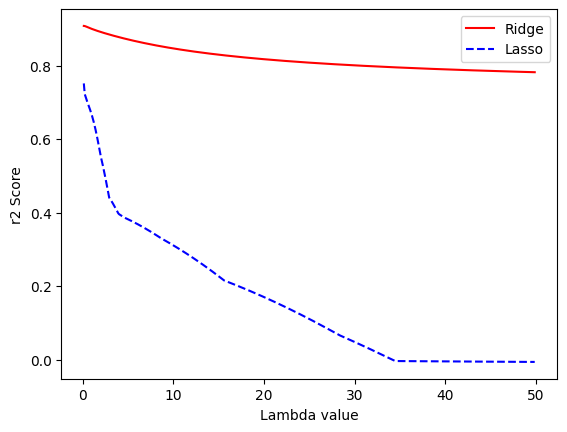

In [66]:
plt.plot([lambda_para/10 for lambda_para in lambda_paras], 
         [tp for tp in ridge_r2], 'r-')
plt.plot([lambda_para/10 for lambda_para in lambda_paras], 
         [vp for vp in lasso_r2], 'b--')
plt.xscale("linear")
plt.ylabel('r2 Score')
plt.xlabel('Lambda value')
plt.legend(['Ridge','Lasso'])
plt.show()

### Hyper parameter tuning

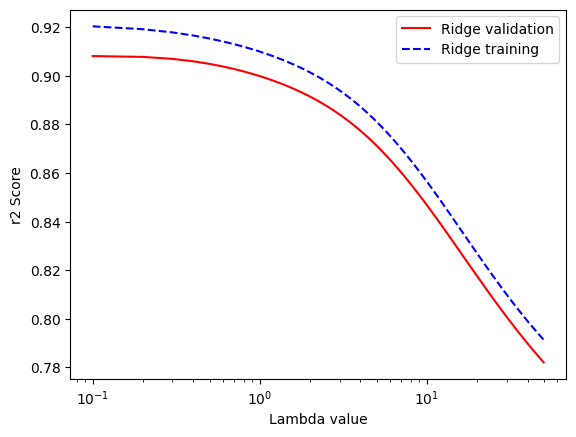

In [67]:
plt.plot([lambda_para/10 for lambda_para in lambda_paras], 
         [tp for tp in ridge_r2], 'r-')
plt.plot([lambda_para/10 for lambda_para in lambda_paras], 
         [vp for vp in training_r2], 'b--')
plt.xscale("log")
plt.ylabel('r2 Score')
plt.xlabel('Lambda value')
plt.legend(['Ridge validation','Ridge training'])
plt.show()

## Final hypothesis testing

In [68]:
model = Ridge(alpha=0.1)
final_training_score = (r2_score(y_train, model.fit(X_train, y_train).predict(X_train)))
final_validation_score = (r2_score(y_val, model.fit(X_train, y_train).predict(X_val)))
final_testing_score = r2_score(y_test, model.fit(X_train, y_train).predict(X_test))

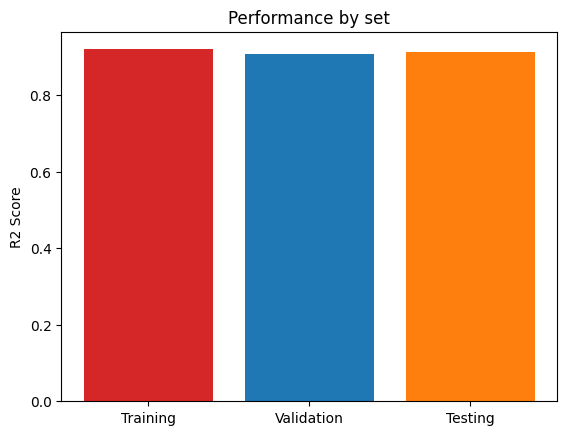

In [69]:
fig, ax = plt.subplots()

sets = ['Training', 'Validation', 'Testing']
scores = [final_training_score, final_validation_score, final_testing_score]
bar_labels = ['red', 'blue', 'orange']
bar_colors = ['tab:red', 'tab:blue',  'tab:orange']

ax.bar(sets, scores, label=bar_labels, color=bar_colors)

ax.set_ylabel('R2 Score')
ax.set_title('Performance by set')

plt.show()